# Dogs Adoption Predictor

The goal of the project is to analyse what it would be the **best home** for a **dog adopted** from the kennel of Barcelona, based on statistical analysis of the place where it'll go to live(square mts) and the area the property is located.

## Analysis planning

1. **Probabilistical analysis** --> **Dog features**

    Finding the **characteristics** of the **dogs available** for **adoption**

2. **Statistical analysis** --> **Houses and Parks** 

    Finding the **best place** for a dog where to live, based on: 
    
    - **age** and **size** of the dogs.
    - **size** and **position** of the house (mqs + presence of parks).

## 0.Import libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import datetime

# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('image', cmap='bwr')
%matplotlib inline

# Statistical analysis libraries
import math
import scipy.stats as stats
from scipy.stats import normaltest

from ipywidgets import interact, interactive, fixed,interact_manual
import ipywidgets as widgets

# Options for DataFrame visualization:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 40)
# Option to show not truncated cells in pandas
pd.set_option('display.max_colwidth', -1)

In [2]:
# pip install RISE

# Probabilistic and Statistical Analysis

## 1. Probabilistic Analysis (Dogs' DF)

## 1.1 Dogs

In [3]:
# Share data between Jupyter Notebooks
%store -r dogs

In [4]:
dogs

'dogs 03-10-2020_02-06.csv'

In [6]:
stats_dogs = pd.read_csv('output_data-cleaning/'+dogs)

In [7]:
stats_dogs.head(5)

,Nombre,Caracteristicas,Sexo,Medidas,Edad,Color,Raza,Nacimiento,Entrada,Años perrera,Estado,Actividad,Compañia,Caracter
0,Gina,Curiosa y elegante,Hembra,Grande,Adulto,Blanco,Mestizo,2010,02/2014,4.1 years,En Adopción,Actividad Normal,Compañia,Cariñoso
1,Horus,Una familia con dedicación,Macho,Grande,Joven,Marron oscuro,Mestizo de Pastor Alemán,03/2016,09/2017,1.5 years,En Adopción,Actividad Normal,Compañia,Difícil
2,Muñeca,Preparada para volver a empezar,Hembra,Mediano,Adulto,Negro,Mestizo,02/2012,07/2018,6.4 years,En Adopción,Actividad Normal,Compañia,Cariñoso
3,Goliath,Necesita un hogar urgente,Macho,Grande,Joven,Gris,Fila Brasileiro,03/2018,02/2019,0.9 years,Urgente,Actividad Normal,"No Apto con perros, gatos, niños",Difícil
4,Bruno,Una persona que lo entienda,Macho,Pequeño,Adulto,Beig,Mestizo de Terrier,10/2011,01/2018,6.3 years,En Adopción,Actividad Normal,Compañia,Cariñoso


In [8]:
print(f'We have {stats_dogs.shape[0]} dogs in the dataset.')

We have 44 dogs in the dataset.


### 1.1.1 Variable types

In [9]:
dogs_cat = stats_dogs.select_dtypes(exclude='number')
dogs_cat.columns

Index(['Nombre', 'Caracteristicas', 'Sexo', 'Medidas', 'Edad', 'Color', 'Raza', 'Nacimiento', 'Entrada', 'Años perrera', 'Estado', 'Actividad', 'Compañia', 'Caracter'], dtype='object')

### Categorical values

All data are **categorical**.

## 1.2 Dogs' features

The data about the **dogs** is extracted directly from the web page of the **Protectora de Barcelona**. https://www.protectorabcn.es/

It is important to know the date of the analysis because the page is updated continuously and the available dogs for adoption could change from a day to another.

In [10]:
now = datetime.datetime.now().strftime('%a %b %d %Y %H:%M')
print(f'Current DATE and TIME of the ANALYSIS: {str(now)}')

Current DATE and TIME of the ANALYSIS: Mon Oct 05 2020 14:35


### Interesting columns

In [11]:
stats_dogs.columns

Index(['Nombre', 'Caracteristicas', 'Sexo', 'Medidas', 'Edad', 'Color', 'Raza', 'Nacimiento', 'Entrada', 'Años perrera', 'Estado', 'Actividad', 'Compañia', 'Caracter'], dtype='object')

In [12]:
stats_dogs.Edad.unique()

array(['Adulto', 'Joven', 'Cachorro', 'Senior'], dtype=object)

In [13]:
stats_dogs.Color.unique()

array(['Blanco', 'Marron oscuro', 'Negro', 'Gris', 'Beig',
       'Canela y blanco', 'Marrón oscuro', 'Chocolate', 'Marrón claro',
       'Negro y marrón', 'Crema', 'Atigrado y blanco', 'Atigrado',
       'Propio', 'Marrón', 'Marrón y blanco', 'No disponible',
       'Blanco y negro', 'Varios', 'Gris oscuro y blanco',
       'Marron y negro'], dtype=object)

In [14]:
stats_dogs.Raza.unique()

array(['Mestizo', 'Mestizo de Pastor Alemán', 'Fila Brasileiro',
       'Mestizo de Terrier', 'Mestizo de Podenco',
       'Mestizo de Bullterrier', 'Podenco', 'Mestizo de caniche',
       'Mestizo de Mastín', 'Staffordshire inglés',
       'Pastor belga malinois', 'Mestizo de Pitbull'], dtype=object)

In [15]:
stats_dogs['Años perrera'].unique()

array(['4.1 years', '1.5 years', '6.4 years', '0.9 years', '6.3 years',
       '5.4 years', '3.9 years', '2.0 years', '7.7 years', '3.6 years',
       '6.2 years', '4.8 years', '8.5 years', '1.3 years', '5.3 years',
       '6.8 years', '2.4 years', '3.3 years', '2.2 years', '1.7 years',
       '4.0 years', '5.2 years', '4.9 years', '4.2 years', '1.1 years',
       '2.3 years', '4.5 years', '12.7 years', '7.5 years', '2.5 years'],
      dtype=object)

## 1.3 Simplifying categories

### Sexo

In [16]:
stats_dogs['Sexo'].unique()

array(['Hembra', 'Macho'], dtype=object)

### Medidas

In [17]:
stats_dogs.Medidas.unique()

array(['Grande', 'Mediano', 'Pequeño', 'Mediano - Grande'], dtype=object)

In [18]:
stats_dogs.Medidas = stats_dogs.apply(lambda x : 'Pequeña' if x['Medidas'] == 'Pequeño' else 'Mediana' 
                                        if x['Medidas'] == 'Mediano' else 'Grande', axis = 1) 

### Edad

In [19]:
stats_dogs.Edad.unique()

array(['Adulto', 'Joven', 'Cachorro', 'Senior'], dtype=object)

In [20]:
stats_dogs['Edad'] = stats_dogs.apply(lambda x : 'Joven' if (x['Edad'] == 'Cachorro') | (x['Edad'] == 'Joven') else 'Adulto', axis = 1) 

### Color

In [21]:
stats_dogs.Color.unique()

array(['Blanco', 'Marron oscuro', 'Negro', 'Gris', 'Beig',
       'Canela y blanco', 'Marrón oscuro', 'Chocolate', 'Marrón claro',
       'Negro y marrón', 'Crema', 'Atigrado y blanco', 'Atigrado',
       'Propio', 'Marrón', 'Marrón y blanco', 'No disponible',
       'Blanco y negro', 'Varios', 'Gris oscuro y blanco',
       'Marron y negro'], dtype=object)

### Color categories

The level of approximation used to simplify categories is subjective.

*Legend*

- **White**: White
- **Black**: Black
- **Brown**: Brown
- **Cream**: Cream
- **Grey**: Grey
- **Mix**: Mix colors
- **Unknown**: Unk

In [22]:
color_cat = ['White', 'Brown', 'Black', 'Grey', 'Cream', 'Mix', 'Brown', 'Brown', 'Brown', 'Mix', 'Cream', 'Mix', 'Mix', 'Unk', 'Brown', 'Mix', 'Unk', 'Mix', 'Mix', 'Mix', 'Mix']

In [23]:
colors = {}
color_list = stats_dogs['Color'].unique()

In [24]:
for i in range(len(color_list)):
    colors[color_list[i]] = color_cat[i]

In [25]:
# Transforming a dictionary in a column of the Dataframe
stats_dogs.Color = stats_dogs.Color.map(colors)

### Raza

In [26]:
stats_dogs.Raza.unique()

array(['Mestizo', 'Mestizo de Pastor Alemán', 'Fila Brasileiro',
       'Mestizo de Terrier', 'Mestizo de Podenco',
       'Mestizo de Bullterrier', 'Podenco', 'Mestizo de caniche',
       'Mestizo de Mastín', 'Staffordshire inglés',
       'Pastor belga malinois', 'Mestizo de Pitbull'], dtype=object)

Dividing the dogs into two categories: **breed dogs** and **crossbreed dogs**.

In [27]:
stats_dogs.Raza = stats_dogs.apply(lambda x : 'Mestizo' if 'Mestizo' in x['Raza'] else 'Perro de Raza', axis = 1)

### Años en la perrera

In [28]:
stats_dogs['Años perrera'].unique()

array(['4.1 years', '1.5 years', '6.4 years', '0.9 years', '6.3 years',
       '5.4 years', '3.9 years', '2.0 years', '7.7 years', '3.6 years',
       '6.2 years', '4.8 years', '8.5 years', '1.3 years', '5.3 years',
       '6.8 years', '2.4 years', '3.3 years', '2.2 years', '1.7 years',
       '4.0 years', '5.2 years', '4.9 years', '4.2 years', '1.1 years',
       '2.3 years', '4.5 years', '12.7 years', '7.5 years', '2.5 years'],
      dtype=object)

Transforming the variable 'Anos perrera' from categoric to numeric

In [29]:
stats_dogs['Años perrera'] =stats_dogs['Años perrera'].str.replace(' years','').astype(float)

## 1.4 Bar plots (simplified categories)

In [30]:
sel_parameters = ['Sexo','Medidas','Edad','Color','Raza']

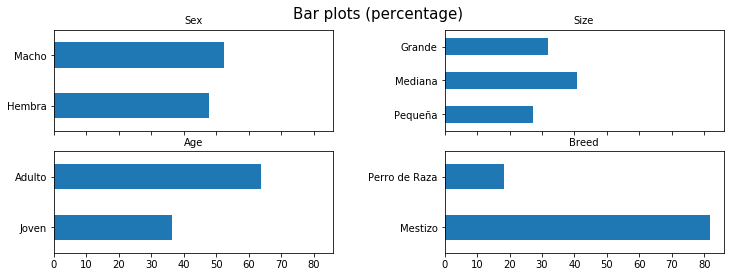

In [31]:
fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2, 2, sharex=True, figsize=(12,4))
fig.suptitle('Bar plots (percentage)', fontsize=15)
fig.subplots_adjust(top = 0.9,wspace=0.4)

plt.sca(ax1)
x1 = (stats_dogs.Sexo.value_counts()*100/len(stats_dogs)).loc[['Hembra', 'Macho']].plot(kind='barh')
ax1.set_title('Sex', loc='center', fontsize=10) 

plt.sca(ax2)
x2 = (stats_dogs.Medidas.value_counts()*100/len(stats_dogs)).loc[['Pequeña', 'Mediana','Grande']].plot(kind='barh')
ax2.set_title('Size', loc='center', fontsize=10);

plt.sca(ax3)
x3 = (stats_dogs.Edad.value_counts()*100/len(stats_dogs)).loc[['Joven', 'Adulto']].plot(kind='barh')
ax3.set_title('Age', loc='center', fontsize=10);

plt.sca(ax4)
x4 = (stats_dogs.Raza.value_counts()*100/len(stats_dogs)).sort_values().loc[['Mestizo', 'Perro de Raza']].plot(kind='barh')
ax4.set_title('Breed', loc='center', fontsize=10)
plt.setp(ax4.get_xticklabels(), rotation=0);

### **Observations**

- **Sex** --> the sex of the dogs is equally distributed.
- **Size** --> the sizes of the dogs is equally distributed.
- **Age** --> almost 2/3 of the dogs are adults.
- **Breed** --> most dogs are are crossbreeded.

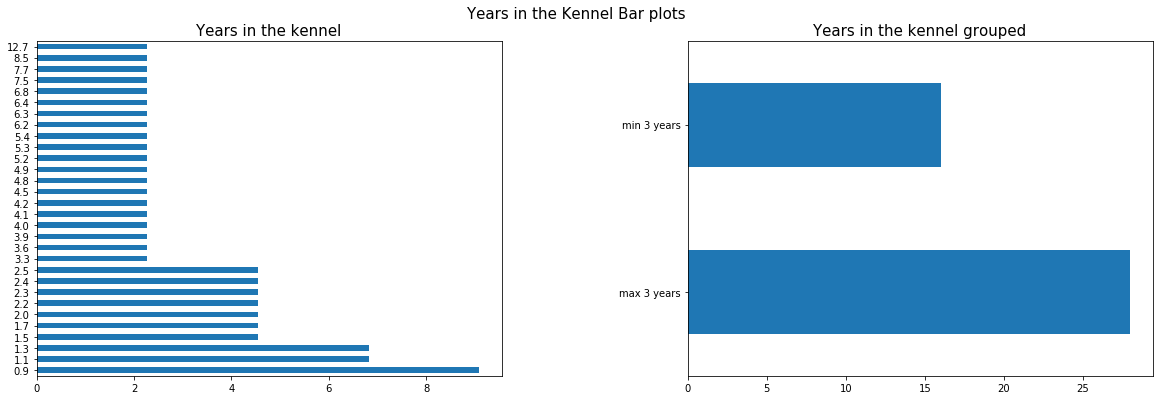

In [32]:
fig, ([ax5, ax6]) = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Years in the Kennel Bar plots', fontsize=15)
fig.subplots_adjust(top = 0.9,wspace=0.4)

plt.sca(ax5)
x5 = (stats_dogs['Años perrera'].value_counts()*100/len(stats_dogs)).plot(kind='barh')
ax5.set_title('Years in the kennel', loc='center', fontsize=15)
ax5.set_yticklabels(sorted(stats_dogs['Años perrera'].unique()))

# Dogs that have lived in the kennel for more than three years
kennel_more3years = stats_dogs[stats_dogs['Años perrera']>3]['Nombre'].count()*100/len(stats_dogs)
kennel_less3years = stats_dogs[stats_dogs['Años perrera']<3]['Nombre'].count()*100/len(stats_dogs)
kennel_years =[kennel_more3years, kennel_less3years]

# sns.barplot(x = stats_dogs['Años perrera'].apply(lambda x: 1 if x >3 else 0).value_counts().index, y = stats_dogs['Años perrera'].apply(lambda x: 1 if x >3 else 0).value_counts(), ax = ax6)
plt.sca(ax6)
x6 = (stats_dogs['Años perrera'].apply(lambda x: 'max 3 years' if x >3 else 'min 3 years').value_counts()).plot(kind='barh')
ax6.set_title('Years in the kennel grouped', loc='center', fontsize=15);

### **Observations**

- **Years in the kennel** --> almost 2/3 of the dogs have lived in the kennel for at least three years.

### Curious statistics

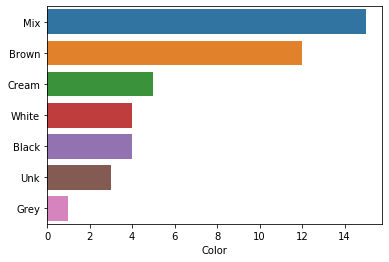

In [33]:
sns.barplot(y = stats_dogs['Color'].value_counts().index, x= stats_dogs['Color'].value_counts());

As observed, almost 2/3 of the dogs are adults. The sizes of the dogs are more equally distributed.

## 1.5 Probability Function

Function of the probability of finding a **dog** with **specific features** in the **list of adoptable dogs**.

### Dogs' features

*Legend*

- sex
- size
- age
- color
- breed
- years in the kennel

In [34]:
sex = stats_dogs.Sexo.unique()

In [35]:
size = stats_dogs.Medidas.unique()

In [36]:
age = stats_dogs.Edad.unique()

In [37]:
color = list(set(color_cat))

In [38]:
breed = stats_dogs.Raza.unique()

In [39]:
years = stats_dogs['Años perrera'].unique()

### Selection criteria

In [40]:
sel_parameters = ['Sexo','Medidas','Edad','Color','Raza']

In [41]:
# @interact(sex=sex, size=size, age=age, color=color, breed=breed)
def total_probability_finder(sex,size,age,color,breed):
 
    '''
    The function calculates the probability that a dog available for adoption can have some features specified by a hypothetical future owner.
    '''     
    
    while len(sel_parameters) != 0:
    
        # Define the filter criteria
        selection=[sex,size,age,color,breed]
    #     print(selection)

        filter_criteria = []
        for sel in selection:
            if sel != '':
                filter_criteria.append(sel)
                if len(filter_criteria) == 1:
                    sel_criteria = filter_criteria[0]
                else:
                    sel_criteria = tuple(filter_criteria)
    #     print(sel_criteria)


        # Create a Dataframe based on predefined filter criteria
        filtered_serie = (stats_dogs.groupby(sel_parameters).agg('count')).iloc[:, 0] / len(stats_dogs)

        # Converts pandas series into a transpose DataFrame (switch columns-rows)
        filtered_df = pd.DataFrame(filtered_serie).T
    #     print(filtered_df)

    #     display(sel_criteria)
        for column in filtered_df.columns:
    #         print(prob)
            if column == sel_criteria:
    #             print(prob == sel_criteria)
                probability = filtered_df[column][0]
                percentage =(round(probability,3))*100
            else:
                continue
            
            return (f'The probability of finding the pet friend of your dreams among the adoptable dogs in the kennel right now is {percentage}%!')            
                     
    print('Choose one characteristic of your future best friend!')

In [42]:
interact(total_probability_finder, sex=sex, size=size, age=age, color=color, breed=breed);

interactive(children=(Dropdown(description='sex', options=('Hembra', 'Macho'), value='Hembra'), Dropdown(descr…

The function doesn't work with widgets ---> Check it!

## 2 Statistics Analysis (Houses' DF)

Provide different statistical test techniques to answer different questions about the Dataset of houses and parks.

## 2.0 Checker functions

### 2.0.1 Significance level

A **significance level**, also known as **alpha** or **α**, defines how strongly the sample evidence must contradict the null hypothesis before you can reject the null hypothesis for the entire population.

In [58]:
alpha = 0.05

In [59]:
def hyp_checker(pvalue):
    
    '''
    Defining a hypothesis checker function
    '''
    
    if pvalue <= alpha:
        return f'The value {pvalue} is smaller than our alpha {alpha}. H0 is rejected'
    else:
        return f'The value {pvalue} is bigger than our alpha {alpha}. Fail to reject H0'

### 2.0.2 Type of test

In [60]:
def test_detector(n):
    
    '''
    Function to find which kind of test we have to use based on the size of the sample.
    '''
    
    if n>30:
        test_par = 'z-test'
        print(f'The sample size is {n} > 30. We can use the {test_par}!')
    else:
        test_par = 'z-test'
        print(f'The sample size is {n} < 30. We can use the {test_par}!')

### 2.0.3 Test normality

In [61]:
# normal_checker_mult(num_houses,districts, houses_avg_sqm_bcn, stats_houses['Distrito'],alpha)

#### Population

In [62]:
def normal_checker_one(n,function,alpha):
    
    '''
    Defining a normal distribution checker function
    
    The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    
    The normal test is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
    '''
    if n <= 5000:
        stat, p = stats.shapiro(function)
        return f"p-value may not be accurate for N > 5000. Shapiro doesn't work!"
        
    else:
        stat, p = stats.normaltest(function)
        if p < alpha:
            return f'p-value {round(p,5)} is smaller than alpha {alpha}. H0 is rejected --> H0 is rejected --> NOT normal distribution (NOT parametric HT)'
        
        else:
            return f'p-value {round(p,5)} is bigger than alpha {alpha}. Fail to reject H0 --> Normal distribution (Parametric HT)'

In [63]:
# normal_checker_one(num_houses,houses_avg_sqm_bcn,alpha)

#### Samples (Districts)

In [64]:
def normal_checker_mult(n, group, df_col, df_filtered,alpha):
    
    '''
    Defining a normal distribution checker function
    
    The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    
    The normal test is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
    '''
    
    for x in group:
        
        group_filter = df_col.loc[df_filtered == x]
        
        if n <= 5000:
            stat, p = stats.shapiro(group_filter)
            return f"p-value may not be accurate for N > 5000. Shapiro doesn't work!"

        else:
            stat, p = stats.normaltest(group_filter)
            if p < alpha:
                print (f'p-value {round(p,5)} for {x} is smaller than alpha {alpha}. H0 is rejected --> NOT normal distribution (NOT parametric HT)')

            else:
                print (f'p-value {round(p,5)} for {x} is bigger than alpha {alpha}. Fail to reject H0 --> Normal distribution (Parametric HT)') 

In [65]:
#  normal_checker_mult(num_houses,districts, houses_avg_sqm_bcn, stats_houses['Distrito'],alpha)

### 2.0.5 District finder

In [66]:
def group_finder(group, df_col, df_filtered, alpha):

    '''
    Find a variable based on the district
    '''
    
    confidence = 1 - alpha
    
    # Columns of the Dataframe
    col_inf=[]
    col_sup=[]
    col_name=[]
    
    for x in group:
        
        group_filter = df_col.loc[df_filtered == x]

        # Statistics parameters
        mean = group_filter.mean()
        std = np.std(group_filter)
        # Code to improve! change the type of test based on types of variables and distribution
        t = stats.t.interval(confidence, ((len(group_filter))-1))[1]

        # Interval
        i = (mean - t*(std/math.sqrt(len(group_filter)))).round(2)
        s = (mean + t*(std/math.sqrt(len(group_filter)))).round(2)
        
        
        # Lists of rows
        col_inf.append(i)
        col_sup.append(s)
        col_name.append(x)
        
        
        # Create a Dataframe
        groups_df = pd.DataFrame({'Distrito': col_name, 'CI-lim_inf': col_inf, 'CI-lim_sup': col_sup})
        
    return groups_df

In [67]:
# group_finder(districts, houses_avg_sqm_bcn, stats_houses['Distrito'], alpha)

### 2.0.6 Distribution by group

In [68]:
def group_distribution(group, df_col, df_filtered):
    
    for x in group:
        group_filter = df_col.loc[df_filtered == x]
        sns.distplot(group_filter)
    plt.show();

In [69]:
# group_distribution(districts, houses_avg_sqm_bcn, stats_houses['Distrito'])

In [70]:
# sns.figsize()

## 2.1 Average Surface of the houses

## Confidence Intervals and Test Normality

### 2.1.0 EDA

In [71]:
# Share data between Jupyter Notebooks
%store -r houses

In [73]:
stats_houses = pd.read_csv('output_data-cleaning/'+houses)

In [74]:
stats_houses.head(20)

,Distrito,Parque,Superficie parque (mq),Barrio,Superficie media casa (mq)
0,Ciutat Vella,Parc de la Ciutadella,1,el Raval,58.9
1,Ciutat Vella,Parc de la Ciutadella,1,el Barrio Gótico,84.9
2,Ciutat Vella,Parc de la Ciutadella,1,la Barceloneta,45.7
3,Ciutat Vella,Parc de la Ciutadella,1,"San Pedro, Santa Caterina y la Ribera",65.3
4,Ciutat Vella,Parc de la Ciutadella,1,el Raval,59.6
5,Ciutat Vella,Parc de la Ciutadella,1,el Barrio Gótico,98.2
6,Ciutat Vella,Parc de la Ciutadella,1,la Barceloneta,33.0
7,Ciutat Vella,Parc de la Ciutadella,1,"San Pedro, Santa Caterina y la Ribera",111.0
8,Ciutat Vella,Parc de la Ciutadella,1,el Raval,58.9
9,Ciutat Vella,Parc de la Ciutadella,1,el Barrio Gótico,78.4


In [75]:
num_houses=stats_houses.shape[0]

In [76]:
print(f'We have the information of about {num_houses} houses and parks in the dataset.')

We have the information of about 8004 houses and parks in the dataset.


### 2.1.1 Variable types

### Numerical values

In [77]:
houses_cat = stats_houses.select_dtypes(include='number')
houses_cat.columns

Index(['Superficie parque (mq)', 'Superficie media casa (mq)'], dtype='object')

### Categorical values

In [78]:
houses_cat = stats_houses.select_dtypes(exclude='number')
houses_cat.columns

Index(['Distrito', 'Parque', 'Barrio'], dtype='object')

### 2.1.2 Analysis population

In [79]:
houses_avgsqm_bcn = stats_houses['Superficie media casa (mq)']

In [80]:
print(f'The city the Barcelona has {len(houses_cat.Distrito.unique())} districts')
print(f'Statistics data the average sqms of the houses/flats of the city of Barcelona')
print(f"Mean sqms houses/flats: {round(houses_avgsqm_bcn.mean(),2)} sqms")
print(f"Median sqms houses/flats: {round(houses_avgsqm_bcn.median(),2)} sqms")      

The city the Barcelona has 10 districts
Statistics data the average sqms of the houses/flats of the city of Barcelona
Mean sqms houses/flats: 81.87 sqms
Median sqms houses/flats: 74.4 sqms


### Distribution average smq of the houses/flats of the city of Barcelona

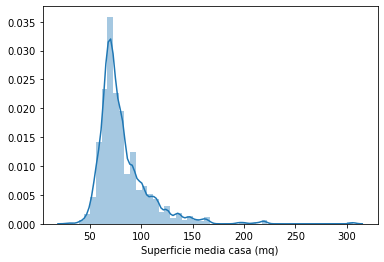

In [81]:
sns.distplot(houses_avgsqm_bcn);

We don't need a test of normality to prove the normality of the curve but we do it anyway ;)

### Test normality

In [82]:
houses_avg_sqm_bcn=stats_houses['Superficie media casa (mq)']
# houses_avg_sqm_bcn

In [83]:
normal_checker_one(num_houses,houses_avg_sqm_bcn,alpha)

'p-value 0.0 is smaller than alpha 0.05. H0 is rejected --> H0 is rejected --> NOT normal distribution (NOT parametric HT)'

### Conclusion

We can see that the distribution is **skewed right** (or **positively skewed**) --> NOT normally distributed!

### 2.1.3 Analysis grouping by District

In [84]:
districts = stats_houses['Distrito'].unique()
# districts

In [85]:
print(f'Statistics data the average sqms of the houses/flats of the city of Barcelona by districts')
print('-'*90)
print(f"Mean sqms houses/flats por districts: ")
print(f"{round(stats_houses.groupby('Distrito')['Superficie media casa (mq)'].mean(),2)}")      
print('-'*90 )
print(f"Median sqms houses/flats por districts: ")
print(f"{round(stats_houses.groupby('Distrito')['Superficie media casa (mq)'].median(),2)}") 

Statistics data the average sqms of the houses/flats of the city of Barcelona by districts
------------------------------------------------------------------------------------------
Mean sqms houses/flats por districts: 
Distrito
Ciutat Vella           68.13 
Gràcia                 79.44 
Horta-Guinardó         70.61 
Les Corts              108.76
Nou Barris             65.95 
Sant Andreu            75.38 
Sant Martí             80.76 
Sants-Montjuïc         69.61 
Sarrià-Sant Gervasi    115.96
l’Eixample             89.73 
Name: Superficie media casa (mq), dtype: float64
------------------------------------------------------------------------------------------
Median sqms houses/flats por districts: 
Distrito
Ciutat Vella           62.80 
Gràcia                 80.20 
Horta-Guinardó         69.35 
Les Corts              88.00 
Nou Barris             64.85 
Sant Andreu            72.70 
Sant Martí             77.15 
Sants-Montjuïc         67.25 
Sarrià-Sant Gervasi    114.15
l’Eixample

### Distribution average smq of the houses/flats by district

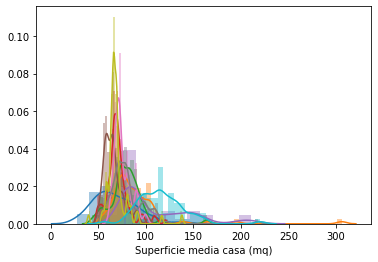

In [86]:
group_distribution(districts, houses_avg_sqm_bcn, stats_houses['Distrito'])

We can see that the distribution is NOT normally distributed, generally is skewed right (or positively skewed).

### Test normality by district

In [87]:
normal_checker_mult(num_houses,districts, houses_avg_sqm_bcn, stats_houses['Distrito'],alpha)

p-value 0.00162 for Ciutat Vella is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for l’Eixample is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Gràcia is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Horta-Guinardó is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Les Corts is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Nou Barris is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Sant Andreu is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Sant Martí is smaller than alpha 0.05. H0 is rejected --> NOT normal distribution (NOT parametric HT)
p-value 0.0 for Sants-Montjuïc is smaller than alp

### Conclusion

We can see that the distributions for district are generally **skewed right** (or **positively skewed**) --> NOT normally distributed!

### Confidence interval

We want to know a **range of plausible values** of the houses'/flats **average dimensions**  divided by **district**.

In [88]:
df_CI=group_finder(districts, houses_avg_sqm_bcn, stats_houses['Distrito'], alpha)
df_CI

,Distrito,CI-lim_inf,CI-lim_sup
0,Ciutat Vella,64.37,71.89
1,l’Eixample,87.32,92.13
2,Gràcia,78.05,80.84
3,Horta-Guinardó,69.91,71.30
4,Les Corts,104.55,112.96
5,Nou Barris,65.19,66.70
6,Sant Andreu,74.80,75.97
7,Sant Martí,79.79,81.74
8,Sants-Montjuïc,68.78,70.43
9,Sarrià-Sant Gervasi,114.38,117.55


In [89]:
df_CI['avg_size_place'] = (df_CI['CI-lim_inf']+df_CI['CI-lim_sup'])/2

In [90]:
min_size_place=df_CI['avg_size_place'].min()
max_size_place=df_CI['avg_size_place'].max()

In [91]:
print(f'Min average surface/district: {min_size_place} mq')
print(f'Max average surface/district: {max_size_place} mq')

Min average surface/district: 65.945 mq
Max average surface/district: 115.965 mq


## 2.2 Percentage parks/ districts

## Chi-Square

- Categorical variables vs categorical variables
- Independent sample

### Hypothesis Test 

**Null Hypothesis** (**H0**) — The percentage of green areas for each district of Barcelona is the same.

**Alternative Hypothesis** (**H1**) — The percentage of green areas for each district of Barcelona is NOT the same.

### 2.2.1 Parks of the city of Barcelona

In [92]:
# Share data between Jupyter Notebooks
%store -r dogs_parks

In [93]:
parks_districts = pd.read_csv('input/'+dogs_parks)

In [113]:
parks_districts.head()

,Distritos,Dirección,Superficie (m2)
0,Ciutat Vella,Parc de la Ciutadella,287
1,Ciutat Vella,Parc de la Barceloneta,451
2,Ciutat Vella,Jardins de Sant Pau del Camp,227
3,l’Eixample,Jardins Montserrat,38
4,l’Eixample,Pl. Doctor Letamendi,8


In [114]:
parks_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
Distritos          105 non-null object
Dirección          105 non-null object
Superficie (m2)    105 non-null object
dtypes: object(3)
memory usage: 2.6+ KB


In [115]:
# parks_districts['Superficie (m2)'].unique()

Drop all lines with no specification about the park area.

In [116]:
parks_districts['Superficie (m2)']=parks_districts['Superficie (m2)'].str.replace('-','–')

In [117]:
# parks_districts['Superficie (m2)']

In [118]:
df_parks=parks_districts[parks_districts['Superficie (m2)'] != '–']

In [119]:
# Converting string in integer
df_parks['Parques(m2)']= df_parks['Superficie (m2)'].astype(int)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
df_parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 103
Data columns (total 4 columns):
Distritos          94 non-null object
Dirección          94 non-null object
Superficie (m2)    94 non-null object
Parques(m2)        94 non-null int32
dtypes: int32(1), object(3)
memory usage: 3.3+ KB


In [121]:
# df_parks=df_parks.groupby('Distritos')['Parques(m2)'].sum()

In [122]:
df_parks

,Distritos,Dirección,Superficie (m2),Parques(m2)
0,Ciutat Vella,Parc de la Ciutadella,287,287
1,Ciutat Vella,Parc de la Barceloneta,451,451
2,Ciutat Vella,Jardins de Sant Pau del Camp,227,227
3,l’Eixample,Jardins Montserrat,38,38
4,l’Eixample,Pl. Doctor Letamendi,8,8
...,...,...,...,...
99,Sarrià-Sant Gervasi,Jardins de Martí Luter,20,20
100,Sarrià-Sant Gervasi,Jardins Mercè Rodoreda,88,88
101,Sarrià-Sant Gervasi,Turó Parc,123,123
102,Sarrià-Sant Gervasi,Jardins Doctor Samuel C. Hahnemann,283,283


### 2.2.2 Total area of districts of Barcelona

Calculating the percentage of parks area for each district.

First, we need to know the total area of every district from https://en.wikipedia.org/wiki/Districts_of_Barcelona

In [123]:
parks_districts['Distritos'].unique()

array(['Ciutat Vella', 'l’Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi'], dtype=object)

In [124]:
area_districts_sqkm = [4.49,7.46, 4.19, 11.96,6.08, 8.04, 6.56, 10.80,21.35, 20.09]
area_districts_sqm = [x*10**6 for x in area_districts_sqkm]

data ={'Distritos': districts, 'Area distrito': area_districts_sqm}

districts_area = pd.DataFrame(data)

In [125]:
districts_area 

,Distritos,Area distrito
0,Ciutat Vella,4490000.0
1,l’Eixample,7460000.0
2,Gràcia,4190000.0
3,Horta-Guinardó,11960000.0
4,Les Corts,6080000.0
5,Nou Barris,8040000.0
6,Sant Andreu,6560000.0
7,Sant Martí,10800000.0
8,Sants-Montjuïc,21350000.0
9,Sarrià-Sant Gervasi,20090000.0


## 2.3 Merge dataframes

In [128]:
green_areas=pd.merge(df_parks, districts_area , on='Distritos')
green_areas

,Distritos,Dirección,Superficie (m2),Parques(m2),Area distrito
0,Ciutat Vella,Parc de la Ciutadella,287,287,4490000.0
1,Ciutat Vella,Parc de la Barceloneta,451,451,4490000.0
2,Ciutat Vella,Jardins de Sant Pau del Camp,227,227,4490000.0
3,l’Eixample,Jardins Montserrat,38,38,7460000.0
4,l’Eixample,Pl. Doctor Letamendi,8,8,7460000.0
...,...,...,...,...,...
89,Sarrià-Sant Gervasi,Jardins de Martí Luter,20,20,20090000.0
90,Sarrià-Sant Gervasi,Jardins Mercè Rodoreda,88,88,20090000.0
91,Sarrià-Sant Gervasi,Turó Parc,123,123,20090000.0
92,Sarrià-Sant Gervasi,Jardins Doctor Samuel C. Hahnemann,283,283,20090000.0


In [129]:
green_areas['% Parques'] = (green_areas['Parques(m2)'] / green_areas['Area distrito'])*100

In [130]:
# green_areas

In [131]:
green_areas['% Parques']

0     0.006392
1     0.010045
2     0.005056
3     0.000509
4     0.000107
        ...   
89    0.000100
90    0.000438
91    0.000612
92    0.001409
93    0.000587
Name: % Parques, Length: 94, dtype: float64

In [132]:
print(f'Min percentage parks/district: {round(min(green_areas["% Parques"]),2)} %')
print(f'Max percentage parks/district: {round(max(green_areas["% Parques"]),2)} %')

Min percentage parks/district: 0.0 %
Max percentage parks/district: 0.02 %


### Categories green areas

- **Zone A**: 0.00-0.004 % green areas
- **Zone B**: 0.004-0.008 % green areas
- **Zone C**: 0.008-0.012 % green areas
- **Zone D**: 0.012-0.016 % green areas
- **Zone E**: 0.016-0.02 % green areas

In [133]:
cat_green_areas = ['A','B','C','D','E']

In [140]:
green_areas['Green Areas'] = green_areas['% Parques'].apply(lambda x: 'A' if (x >= 0) & (x < 0.004) else
                                            'B' if (x >= 0.004) & (x < 0.008) else
                                            'C' if (x >= 0.008) & (x < 0.012) else
                                            'D' if (x >= 0.012) & (x < 0.016) else
                                            'E')

In [141]:
green_areas['Green Areas'] 

0     B
1     C
2     B
3     A
4     A
     ..
89    A
90    A
91    A
92    A
93    A
Name: Green Areas, Length: 94, dtype: object

In [142]:
green_areas

,Distritos,Dirección,Superficie (m2),Parques(m2),Area distrito,% Parques,Green Areas
0,Ciutat Vella,Parc de la Ciutadella,287,287,4490000.0,0.006392,B
1,Ciutat Vella,Parc de la Barceloneta,451,451,4490000.0,0.010045,C
2,Ciutat Vella,Jardins de Sant Pau del Camp,227,227,4490000.0,0.005056,B
3,l’Eixample,Jardins Montserrat,38,38,7460000.0,0.000509,A
4,l’Eixample,Pl. Doctor Letamendi,8,8,7460000.0,0.000107,A
...,...,...,...,...,...,...,...
89,Sarrià-Sant Gervasi,Jardins de Martí Luter,20,20,20090000.0,0.000100,A
90,Sarrià-Sant Gervasi,Jardins Mercè Rodoreda,88,88,20090000.0,0.000438,A
91,Sarrià-Sant Gervasi,Turó Parc,123,123,20090000.0,0.000612,A
92,Sarrià-Sant Gervasi,Jardins Doctor Samuel C. Hahnemann,283,283,20090000.0,0.001409,A


## 2.4 Chi-Square test 

**Chi-Square test** is a statistical significance test used in the analysis of contingency tables. It is employed when sample sizes are small.

### Sample size

In [143]:
print(f'The sample size of this test is {parks_districts.shape[0]} elements')

The sample size of this test is 105 elements


Creating a **contingency table** comparing the districts and the category of green areas.

In [144]:
contingency_table=pd.crosstab(green_areas['Distritos'],green_areas['Green Areas'], rownames=['Distritos'], colnames=['Areas Verdes'])
contingency_table

Areas Verdes,A,B,C,D,E
Distritos,,,,,
Ciutat Vella,0,2,1,0,0
Gràcia,4,4,1,0,1
Horta-Guinardó,6,2,0,0,0
Les Corts,3,3,2,0,0
Nou Barris,3,2,2,0,0
Sant Andreu,8,3,0,0,0
Sant Martí,7,3,1,0,1
Sants-Montjuïc,12,0,0,0,0
Sarrià-Sant Gervasi,12,1,0,0,0


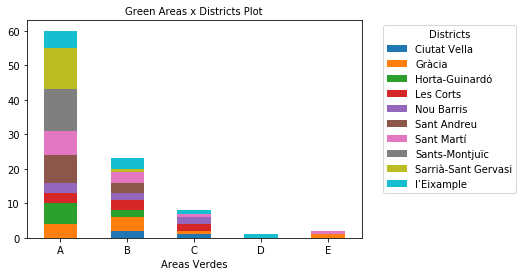

In [145]:
contingency_table.T.plot.bar(stacked=True)
plt.xticks(rotation=0)
plt.yticks()
plt.title('Green Areas x Districts Plot', loc='center', fontsize=10)
plt.legend(title='Districts', bbox_to_anchor=(1.05, 1), loc='upper left');

Perform a chi-squared test using the chi2_contingency function

In [146]:
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
round(p,3)

0.166

In [147]:
hyp_checker(round(p,3))

'The value 0.166 is bigger than our alpha 0.05. Fail to reject H0'

The percentage of green areas for each district of Barcelona is NOT the same but we can't understand if the differences are significant or not.

This is not the right test to use. FAILED!
The chi-square test determines whether there is an association between categorical variables.
In this specific case, we gruop the variables by district so the comparison is not possible.

## Conclusion


It was difficult for me to find relationships to compare the datasets available and the final project is not what I wanted to do.

Anyway, I think the process of data manipulation and EDA could be a good point to start the project with **another focus**: find which is the best dog for a person with particular features (age, place where she/he lives, sqm of the house...)

**To be continued...**